In [230]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [231]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [232]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [233]:
dataset.shape

(10000, 14)

In [234]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [235]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [236]:
dataset.duplicated().sum()

0

In [237]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [238]:
dataset.drop('RowNumber',axis=1, inplace=True)
dataset.drop('CustomerId',axis=1, inplace=True)
dataset.drop('Surname',axis=1, inplace=True)

In [239]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<ipython-input-240-092d55f410e5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_corr = dataset.corr()


<Axes: >

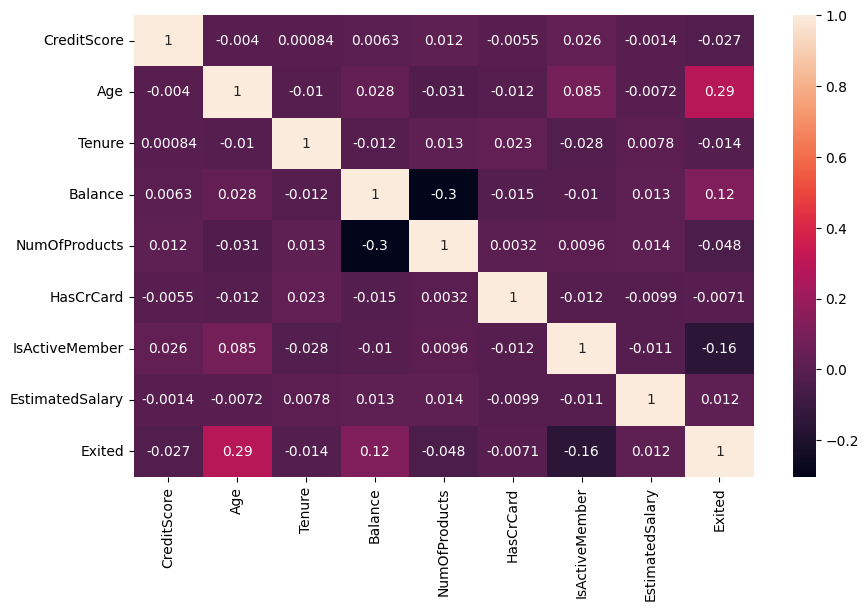

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10, 6))
top_corr = dataset.corr()
sns.heatmap(top_corr, annot=True)

<Axes: >

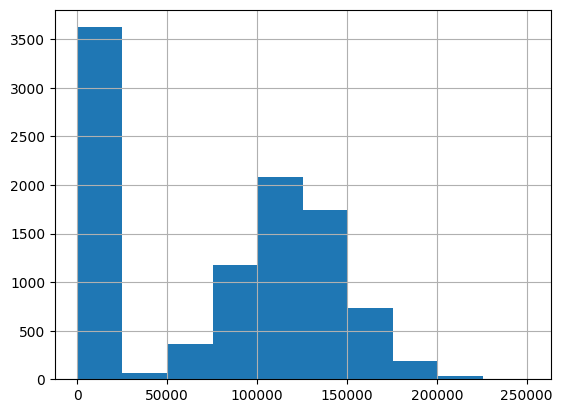

In [241]:
dataset["Balance"].hist()

<ipython-input-242-252a6715b223>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CreditScore"],
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='CreditScore', ylabel='Density'>

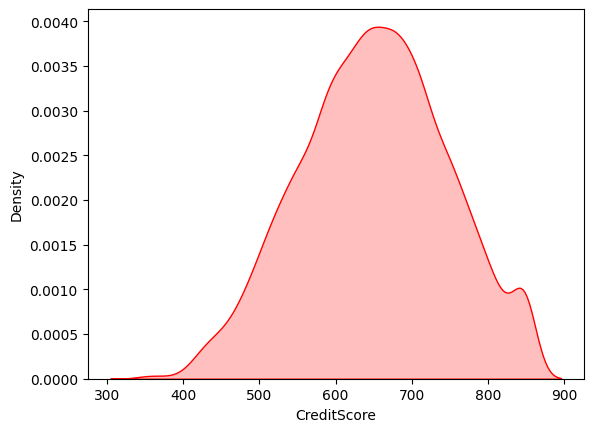

In [242]:
sns.distplot(dataset["CreditScore"],
            kde_kws ={'shade':True},
             color='red',
            hist=False
            )

In [243]:
female= dataset.loc[(dataset["Gender"] == "Female")]
female=len(female.index)
female

4543

In [244]:
male= dataset.loc[(dataset["Gender"] == "Male")]
male=len(male.index)
male

5457

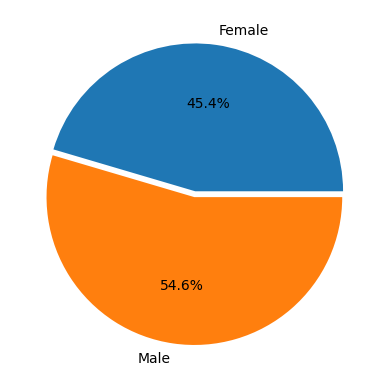

In [245]:
plt.pie([female,male],labels=('Female','Male'),
explode = [0.02,0.02],autopct ='%1.1f%%')
plt.show()

In [246]:
dataset["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [247]:
France= dataset.loc[(dataset["Geography"] == "France")]
France=len(France.index)
France

5014

In [248]:
Spain= dataset.loc[(dataset["Geography"] == "Spain")]
Spain=len(Spain.index)
Spain

2477

In [249]:
Germany= dataset.loc[(dataset["Geography"] == "Germany")]
Germany=len(Germany.index)
Germany

2509

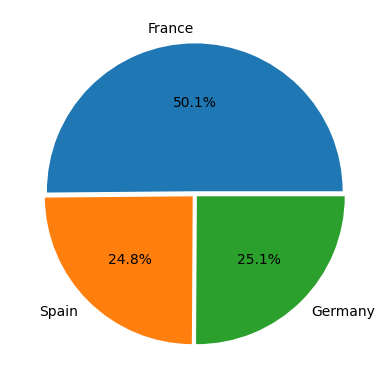

In [250]:
plt.pie([France,Spain,Germany],labels=('France','Spain','Germany'),
explode = [0.02,0.02,0.02],autopct ='%1.1f%%')
plt.show()

<Axes: xlabel='NumOfProducts', ylabel='Count'>

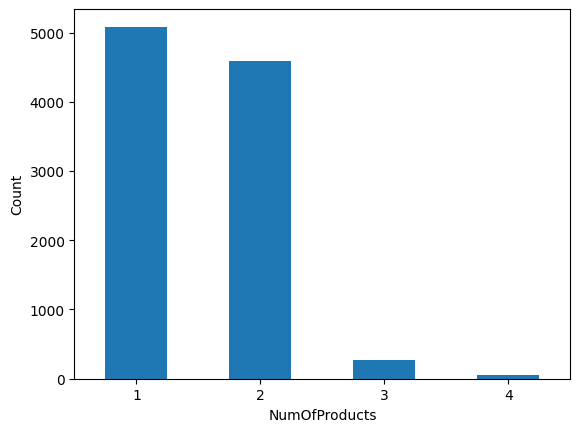

In [251]:
dataset["NumOfProducts"].value_counts().plot(kind='bar',xlabel='NumOfProducts',ylabel='Count',rot=0)

In [252]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [253]:
dataset.replace(
 {
     'Gender': {'Male': 0, 'Female': 1},
      'Geography': {'France': 0, 'Spain': 1,'Germany': 2}
}
,
inplace= True
)

In [254]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [255]:
from collections import Counter
print(Counter(dataset["Exited"]).items())
# imblanced data

dict_items([(1, 2037), (0, 7963)])


In [256]:
y= dataset[['Exited']]
x = dataset.drop(['Exited'],axis=1)

smote works in minor class : first find and neighbors then draw lines between this points then can plot many points on this lines

In [257]:
from imblearn.over_sampling import SMOTE
S=SMOTE()
x,y=S.fit_resample(x,y)
y.shape

(15926, 1)

In [258]:
newdataset=pd.concat([x, y], axis=1)
newdataset.shape

(15926, 11)

In [259]:
newdataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

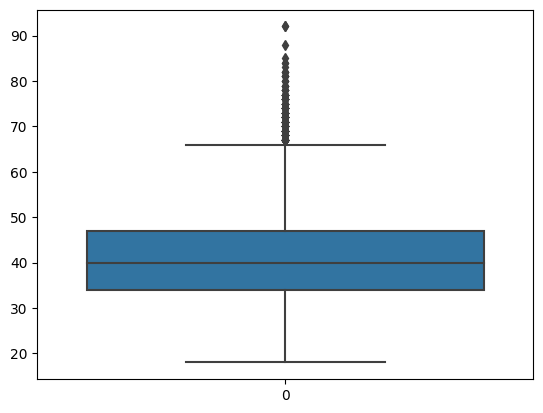

In [260]:
sns.boxplot(newdataset['Age'])

In [261]:
import scipy.stats as stats
Q1 = newdataset.quantile(q=.25)
Q3 = newdataset.quantile(q=.75)
IQR = newdataset.apply(stats.iqr)

In [262]:
newdataset= newdataset[~((newdataset < (Q1-1.5*IQR)) | (newdataset > (Q3+1.5*IQR))).any(axis=1)]

In [263]:
newdataset.shape

(15574, 11)

<Axes: >

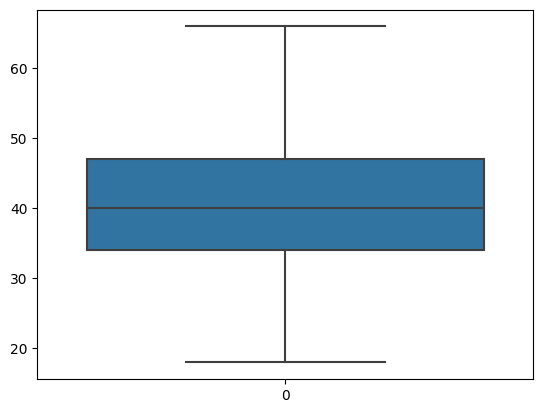

In [264]:
sns.boxplot(newdataset['Age'])

In [265]:
y= newdataset[['Exited']]
x = newdataset.drop(['Exited'],axis=1)

In [266]:
newdataset.head()
# normalize dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [272]:
# normalization the dataset with range 0,1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
x = scaler.fit_transform(x)

In [273]:
#split the dataset
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [274]:
#KNN algo
# define the parameter values that should be searched
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
knn=KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search=grid.fit(x_train, y_train)
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

0.8149117819592979
{'n_neighbors': 6, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [277]:
# train our model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [279]:
# Model Evaluation for KNN
from sklearn.metrics import classification_report
print("confusion_matrix",confusion_matrix(y_test, y_pred))
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print("precision_score = ",precision_score(y_test, y_pred))
print("recall_score = ",recall_score(y_test, y_pred))
print("f1_score = ",f1_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

confusion_matrix [[1162  369]
 [ 270 1314]]
accuracy_score =  0.7948635634028892
precision_score =  0.7807486631016043
recall_score =  0.8295454545454546
f1_score =  0.8044077134986226
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1531
           1       0.78      0.83      0.80      1584

    accuracy                           0.79      3115
   macro avg       0.80      0.79      0.79      3115
weighted avg       0.80      0.79      0.79      3115



In [ ]:
# SVM Algo
from sklearn import svm
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid2 = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid2.fit(x_train,y_train)
print(grid2.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   6.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   4.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   9.7s
[CV] END ......................C=0.1, gamma=0.0

In [ ]:
classifier = svm.SVC(C=1000,gamma= 0.1, kernel= 'rbf')
classifier.fit(x_train, y_train)
y_svm_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("confusion_matrix",confusion_matrix(y_test, y_svm_pred))
print("accuracy_score = ",accuracy_score(y_test, y_svm_pred))
print("precision_score = ",precision_score(y_test, y_svm_pred))
print("recall_score = ",recall_score(y_test, y_svm_pred))
print("f1_score = ",f1_score(y_test, y_svm_pred))
print(classification_report(y_test,y_svm_pred))

confusion_matrix [[1223  308]
 [ 305 1280]]
accuracy_score =  0.8032734274711169
precision_score =  0.8060453400503779
recall_score =  0.807570977917981
f1_score =  0.8068074377560668
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      1531
         1.0       0.81      0.81      0.81      1585

    accuracy                           0.80      3116
   macro avg       0.80      0.80      0.80      3116
weighted avg       0.80      0.80      0.80      3116



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
params = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=lr, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters:  {'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy score:  0.7570017879919312


In [ ]:
#Logistic Regression
logisticRegr = LogisticRegression(C= 0.23357214690901212,penalty= "l2", solver="saga")
logisticRegr.fit(x_train,y_train)
y_LR_pred = logisticRegr.predict(x_test)
y_LR_pred

array([1., 1., 1., ..., 0., 1., 1.])

In [ ]:
# Model Evaluation for LogisticRegression
print("confusion_matrix",confusion_matrix(y_test, y_LR_pred))
print("accuracy_score = ",accuracy_score(y_test, y_LR_pred))
print("precision_score = ",precision_score(y_test, y_LR_pred))
print("recall_score = ",recall_score(y_test, y_LR_pred))
print("f1_score = ",f1_score(y_test, y_LR_pred))

confusion_matrix [[1165  400]
 [ 346 1205]]
accuracy_score =  0.7605905006418485
precision_score =  0.7507788161993769
recall_score =  0.7769181173436492
f1_score =  0.7636248415716096


DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
params = {    
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}
Best accuracy score:  0.7951208166171864


In [ ]:
#DecisionTree
DT=DecisionTreeClassifier(criterion="gini",max_depth=6, min_samples_leaf= 1,min_samples_split= 7)
DT.fit(x_train,y_train)
y_DT_pred=DT.predict(x_test)
y_DT_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Model Evaluation for DecisionTree
print("confusion_matrix",confusion_matrix(y_test, y_DT_pred))
print("accuracy_score = ",accuracy_score(y_test, y_DT_pred))
print("precision_score = ",precision_score(y_test, y_DT_pred))
print("recall_score = ",recall_score(y_test, y_DT_pred))
print("f1_score = ",f1_score(y_test, y_DT_pred))

confusion_matrix [[1286  279]
 [ 368 1183]]
accuracy_score =  0.7923620025673941
precision_score =  0.8091655266757866
recall_score =  0.7627337201805287
f1_score =  0.7852638566213077


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy score:  0.8411051103603734


In [ ]:
RF = RandomForestClassifier(max_depth = None, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)
RF.fit(x_train,y_train);
y_RF_pred=RF.predict(x_test)
y_RF_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [ ]:
# Model Evaluation for RandomForestClassifier
print("confusion_matrix",confusion_matrix(y_test, y_RF_pred))
print("accuracy_score = ",accuracy_score(y_test, y_RF_pred))
print("precision_score = ",precision_score(y_test, y_RF_pred))
print("recall_score = ",recall_score(y_test, y_RF_pred))
print("f1_score = ",f1_score(y_test, y_RF_pred))

confusion_matrix [[1321  244]
 [ 228 1323]]
accuracy_score =  0.8485237483953787
precision_score =  0.8442884492661136
recall_score =  0.8529980657640233
f1_score =  0.8486209108402823
